### Project Overview
&nbsp;
<div style='text-align:justify'>The Boston housing market is highly competitive, and you want to be the best real estate agent in the area. To compete with your peers, you decide to leverage a few basic machine learning concepts to assist you and a client with finding the best selling price for their home. Luckily, you’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. Your task is to build an optimal model based on a statistical analysis with the tools available. This model will then be used to estimate the best selling price for your clients' homes.</div>

In [25]:
# Import libraries necessary for this project
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

# Import sklearn training and testing data splitter
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
import seaborn as sns
import visuals as vs


%matplotlib inline
sns.set_style("whitegrid")

# Load the Boston Housing Dataset
boston = pd.read_csv('Dataset/BostonHousing.csv')
boston.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [26]:
prices = boston['MEDV']
features = boston.drop(['MEDV'], axis=1)
print(features.head())
print(f"Boston Housing Dataset has {boston.shape[0]} data points with {boston.shape[1]} variables each.")

      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7
Boston Housing Dataset has 489 data points with 4 variables each.


### Data Exploration

In [27]:
# Minimum Price of the Data
minimum_price = np.min(prices)

# Maximum Price of the Data
maximum_price = np.max(prices)

# Mean Price of the Data
mean_price = np.mean(prices)

# Median Price of the Data
median_price = np.median(prices)

# Standard Deviation of Prices of the Data
std_price = np.std(prices)

# Calculated Stats
print(f"Stats for Boston Housing Dataset: ")
print(f"Minimum Price: $ {minimum_price:.2f}")
print(f"Maximum Price: $ {maximum_price:.2f}")
print(f"Mean Price: $ {mean_price:.2f}")
print(f"Median Price: $ {median_price:.2f}")
print(f"Standard Deviation Price: $ {std_price:.2f}")

Stats for Boston Housing Dataset: 
Minimum Price: $ 105000.00
Maximum Price: $ 1024800.00
Mean Price: $ 454342.94
Median Price: $ 438900.00
Standard Deviation Price: $ 165171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: 

'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.

'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

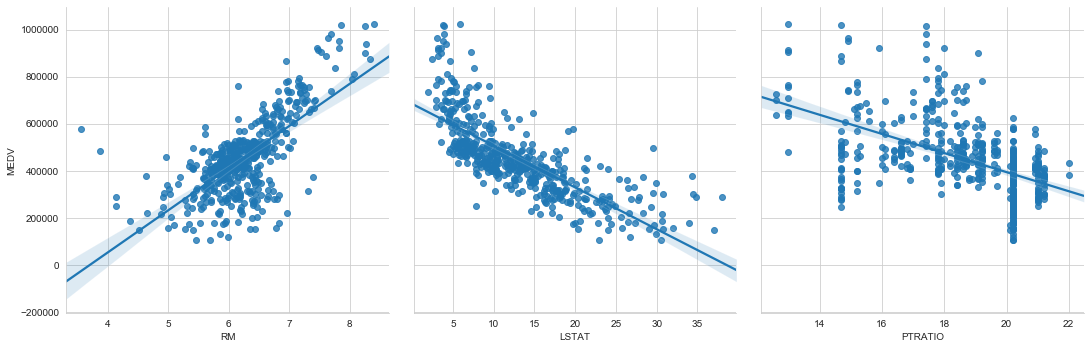

In [28]:
# Linear regression could be used to justify the intuition that the gradient is positive for a positive relationship and negative for a negative relationship.
sns.pairplot(boston, x_vars=['RM', 'LSTAT', 'PTRATIO'], y_vars=['MEDV'], height=5, kind='reg')
plt.show()

### Intuition
&nbsp;
<div style='text-align:justify'>
    
**RM**: An increase in the value of RM will lead to an increase in the value of MEDV. This its obvious and confirmed with above statistics and can also be confirmed with the help of correlation, a home with more number of rooms must be more expensive than a home with less number of rooms.

**LSTAT**: An increase in the value of LSTAT will lead to decrease in the value of MEDV. A lower class homeowner might not be able to afford expensive houses. So you would expect them to leave in cheaper home.

**PTRATIO**: 'PTRATIO' is negatively correlated with the price. A lower 'LSTAT' means that teacher could pay more attention to each of students which indicates a better education, so that would be more expensive.
</div>

In [29]:
# Justifying with Pearson's Coefficient
boston[['RM','MEDV']].corr(method='pearson')
# The Pearson Coeff r=0.697209 > 0, which indicates positive correlation. Hence as RM increases MEDV increases.

,RM,MEDV
RM,1.000000,0.697209
MEDV,0.697209,1.000000


In [30]:
# Justifying with Pearson's Coefficient
boston[['LSTAT','MEDV']].corr(method='pearson')
# The Pearson Coeff r=-0.76067 < 0, which indicates negative correlation. Hence as LSTAT increases MEDV decreases.

,LSTAT,MEDV
LSTAT,1.00000,-0.76067
MEDV,-0.76067,1.00000


In [31]:
# Justifying with Pearson's Coefficient
boston[['PTRATIO','MEDV']].corr(method='pearson')
# The Pearson Coeff r=-0.519034 < 0, which indicates negative correlation. Hence as PTRATIO increases MEDV decreases.

,PTRATIO,MEDV
PTRATIO,1.000000,-0.519034
MEDV,-0.519034,1.000000


### Developing a Model

### Implementation: Define a Performance Metric
<div style='text-align:justify'>It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.</div>
&nbsp;
<div style='text-align:justify'>
The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.</div>

In [32]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the Score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the predictions for the target variable.

Would you consider this model to have successfully captured the variation of the target variable? Why or why not ?

In [33]:
# Calculate the performance of the model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5,0.0, 2.1,7.8,5.3])
print(f"Model has a coefficient of determination, R^2, of {score:.2f}")

Model has a coefficient of determination, R^2, of 0.92


**Answer:**
$R^{2}$ could be interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. Since 0.923 is a pretty high value in range 0 to 1, so I think it is successful.

In [34]:
### Implementation: Shuffle and Split Data
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=7)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer**:
By splitting our dataset into training and testing we can validate our model, i.e. measure the accuracy of our training model.

If the entire dataset is used for training, our model will memorize the data and overfitting/under-generalization will occur and our model will not be able to guess answers with accuracy.

If the entire dataset is used for testing, the model will not learn anything and underfitting/over-generalization will occur and again our model will not be able to guess answers with accuracy.

To overcome this we have to split our dataset into a suitable ratio of training and testing data and our model should not see the testing data at all untill the end. This optimizes of model for a good fit and high accuracy leaving the testing data for us to validate the accuracy of our model and avoid error caused by underfitting and overfitting.

### Analyzing Model Performance
&nbsp;
<div style='text-align:justify'>Look at several models learning and testing performances on various subsets of training data. Additionally, investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.</div>

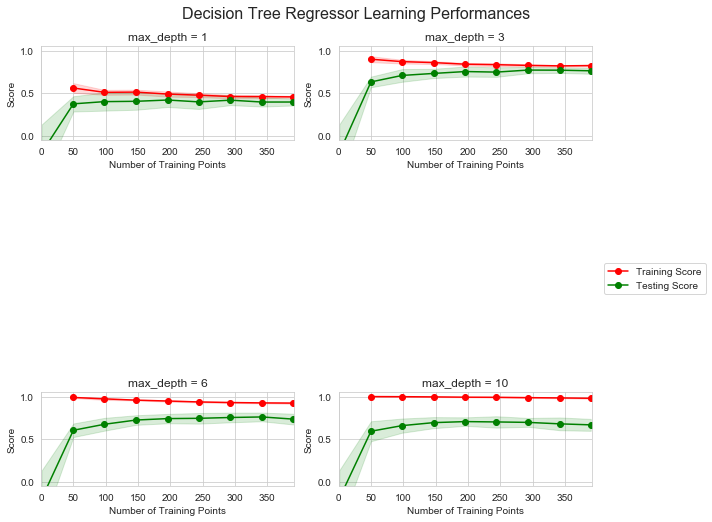

In [35]:
vs.ModelLearning(features, prices)

**Considering learning curve of model with Maximum Depth = 3**

For given depth value, as more training points are added to the model the score of training curve slowly starts decreasing

There is a instant increase in testing score from 0 to 0.7 for first 50 data points and then it is gradually increasing for further addition of data points.

The training and testing curve seems to be converging to a score of 0.8

Therefore, having more training point will surely not benefits the model.

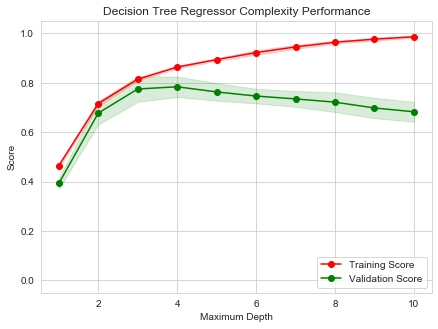

In [36]:
vs.ModelComplexity(X_train, y_train)